# NEU Surface Defect Dataset

The NEU Surface Defect Database was developed by K. Song and Y. Yan. [The original link appears to be broken.](http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html) Fortunately, we have a copy of it stored on Box. The original paper describing the dataset and some methods for performing classification is [here](https://doi.org/10.1016/j.apsusc.2013.09.002).

K. Song and Y. Yan, “A noise robust method based on completed local binary patterns for hot-rolled steel strip surface defects,” Applied Surface Science, vol. 285, pp. 858-864, Nov. 2013.

### Dataset Details
The original dataset contains 1800 images of 6 types of surface defects in hot-rolled steel strip. The images we will be working with are RGB bitmap images with the class of the defect noted as a two-character code in the filename. The codes and defect types are noted below:
- Cr: Crazing
- In: Inclusion
- Pa: Patches
- PS: Pitted Surface
- RS: Rolled-in Scale
- Sc: Scratch

### Exercise Goals
1. Prepare dataset for analysis
2. Show example images and classes
3. Save images and class labels in a convenient manner for future use.
___

## 1. Prepare Dataset for Analysis 
In this section we'll cover some basic IO for reading the data, exploring the dataset, and making convenient data structures for further analysis.

In [1]:
# let's quickly verify that our kernel is running
import sys
print(sys.version)

3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
print("Hello Jupyter")

Hello Jupyter


In [5]:
!pip install matplotlib

In [4]:
# import libraries that we'll use
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from sklearn.utils import shuffle

# Jupyter magic command
%matplotlib inline

In [6]:
# Let's make a helper function to help us find data files
def get_files(file_directory, extension='*.bmp'):
    """
    Arguments:
        file_directory: path to directory to search for files
        extension: desired file type, default *.bmp (bitmap)
    
    Return:
        files: list of files in file_directory with extension
    """
    files = glob.glob(os.path.join(file_directory, extension))
    return files

In [7]:
os.path.join?

Signature: os.path.join(a, *p)
Docstring:
Join two or more pathname components, inserting '/' as needed.
If any component is an absolute path, all previous path components
will be discarded.  An empty last part will result in a path that
ends with a separator.
File:      /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/posixpath.py
Type:      function


In [8]:
glob.glob?

Signature: glob.glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/glob.py
Type:      function


In [10]:
# path to data
DATA_PATH = os.path.join('..', 'data', 'NEU-CLS')

In [11]:
print(DATA_PATH)

../data/NEU-CLS


Let's go ahead and make a list of all of our images. As we've discussed, this dataset has 1800 images so we expect this list to have length of 1800.

In [13]:
image_paths = get_files(file_directory=DATA_PATH, extension='*.bmp')
print(len(image_paths))

1800


In [14]:
# let's see what the first couple of images are called
print(image_paths[0:2])

['../data/NEU-CLS/Sc_1.bmp', '../data/NEU-CLS/Sc_215.bmp']


We can see that each image path is indeed a path to a particular image. Let's open an image to see how it looks.

../data/NEU-CLS/Sc_1.bmp


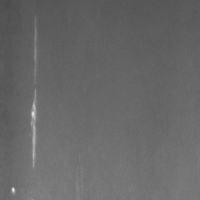

In [15]:
print(image_paths[0])
img = PIL.Image.open(image_paths[0])
img

In [16]:
# and we can check the size of the image
print(img.size)

(200, 200)


In [17]:
type(img)

PIL.BmpImagePlugin.BmpImageFile

### Examine data structure
It looks like this dataset is 1800 bitmap images of size (200, 200). We can see the class label in the filename, but ideally we'd like to structure our data such that we have something like
```
x: data
y: labels
```

Let's make our list of labels, y

In [19]:
image_path = image_paths[0]
print(image_path)

../data/NEU-CLS/Sc_1.bmp


In [22]:
_, filename = os.path.split(image_path)

print(_)
print(filename)

../data/NEU-CLS
Sc_1.bmp


In [29]:
# All of the images are labeled with the pattern YY_#.bmp
# We can use this to our advantage to parse the label from the filename

# let's look at just one image for now
image_path = image_paths[1]
_, filename = os.path.split(image_path)
print(filename)

Sc_215.bmp


Great! It looks pretty simple to pull the filename from the image. And there are a couple of ways that we can extract the label from here.
1. We can take the first two characters, or
2. We can split the string using the underscore as our marker

In [30]:
type(filename)

str

In [31]:
filename

'Sc_215.bmp'

In [26]:
filename.split?

Signature: filename.split(sep=None, maxsplit=-1)
Docstring:
Return a list of the words in the string, using sep as the delimiter string.

sep
  The delimiter according which to split the string.
  None (the default value) means split according to any whitespace,
  and discard empty strings from the result.
maxsplit
  Maximum number of splits to do.
  -1 (the default value) means no limit.
Type:      builtin_function_or_method


In [32]:
print(filename[:2])
print(filename.split('_'))
print(filename.split('_')[0]) # index 0: get the first entry from this list

Sc
['Sc', '215.bmp']
Sc


---
**Discuss** 

Why would we want to use one method over the other? Does it really matter in this case?

---

Now that we have a good strategy to extract labels, let's store these as a convenient variable, `y`. Again, there is more than one way to go about this. I'll show you a couple of ways.
1. For Loop (perhaps the more intuitive way)
2. List comprehension (a cool thing we can do in Python)

In [33]:
# For Loop Example (5 lines)
y = [] # make an empty list

In [35]:
type(y)

list

In [36]:
for image_path in image_paths:
    _, filename = os.path.split(image_path)  # note the underscore is a commonly used dummy variable 
    label, _ = filename.split('_') # and sometimes it can make code a bit more readable
    y.append(label)
    
print(len(y))
print(y[:10])

1800
['Sc', 'Sc', 'Sc', 'Pa', 'Pa', 'In', 'Sc', 'In', 'Pa', 'In']


Simple enough. Now let's start over. We'll delete the variable y and try again.

In [37]:
del y

In [39]:
# List comprehension example (1 line)
# Performs same task as for loop example above
y = [os.path.split(image_path)[1].split('_')[0] for image_path in image_paths]
print(len(y))
print(y[:10])

1800
['Sc', 'Sc', 'Sc', 'Pa', 'Pa', 'In', 'Sc', 'In', 'Pa', 'In']


List comprehensions are great for consolidating code, but they can quickly become hard to read if you squish too many steps into the one line. That being said, I'm a big fan of list comprehensions. Just be sure to describe what they do.

### Make a DataFrame with Pandas
It's worth noting that this dataset is small and can easily be read into memory even on my laptop. But as we move forward we may not be so lucky. Let's try one method that will make it easy for us to manage our data: Pandas!

In [40]:
# we've already import pandas as pd
df = pd.DataFrame(data=list(zip(image_paths, y)), 
                  columns=['image_path', 'label'])

In [41]:
# we can check the first few lines our dataframe
df.head()

,image_path,label
0,../data/NEU-CLS/Sc_1.bmp,Sc
1,../data/NEU-CLS/Sc_215.bmp,Sc
2,../data/NEU-CLS/Sc_201.bmp,Sc
3,../data/NEU-CLS/Pa_169.bmp,Pa
4,../data/NEU-CLS/Pa_141.bmp,Pa


In [43]:
df.shape

(1800, 2)

In [44]:
# We can even save our dataframe so that we don't have to do all of this in the future
DF_PATH = os.path.join('..', 'data', 'NEU_dataframe.pkl')
df.to_pickle(DF_PATH)

In [45]:
del df

In [46]:
df

NameError: name 'df' is not defined

In [47]:
# loading the dataframe is simple too
df = pd.read_pickle(DF_PATH)
df.head()

,image_path,label
0,../data/NEU-CLS/Sc_1.bmp,Sc
1,../data/NEU-CLS/Sc_215.bmp,Sc
2,../data/NEU-CLS/Sc_201.bmp,Sc
3,../data/NEU-CLS/Pa_169.bmp,Pa
4,../data/NEU-CLS/Pa_141.bmp,Pa


And that's it! That's pretty much all we need to do to structure our data for further exploration! Without all of the extra fluff that I've written to type everything out, it really is as easy as
```python
image_paths = get_files(DATA_PATH)
y = [os.path.split(image_path)[1].split('_')[0] for image_path in image_paths]
df = pd.DataFrame(data=list(zip(image_paths, y)), 
                  columns=['image_path', 'label'])
```

## 2. Visualize the Data
To this point our focus has been on the filenames and the labels of the images, but now we're going to look a bit more at the images directly. This is an important step to understand for ourselves what types of things we might want to consider in future decisions. 

To do this, let's do a few things:
1. Shuffle the data in the dataframe
2. Use Pandas to group the data by the various classes we have
3. Randomly sample from each group
4. Show a handful of images from each class

In [49]:
# 1. Shuffle the data in the dataframe
df = shuffle(df)

# 2. Use Pandas to group the data by label
subset = df.groupby('label', as_index=False)

# 2. Let's quickly double-check the number of groups in this subset (we expect 6)
n_groups = len(subset)
print(n_groups)

6


In [51]:
df.loc?

Type:        property
String form: <property object at 0x1131195e0>
Docstring:  
Purely integer-location based indexing for selection by position.

``.iloc[]`` is primarily integer position based (from ``0`` to
``length-1`` of the axis), but may also be used with a boolean
array.

Allowed inputs are:

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.

``.iloc`` will raise ``IndexError`` if a requested indexer is
out-of-bounds, except *slice* indexers which allow out-of-bounds
indexing (this conforms with python/numpy *slice* semantics).

See more at :ref:`Selection by Position <indexing.integer>`.

See Also
--------


In [52]:
# 3. Randomly sample from each group
# We'll use a cool trick called a lambda function

sample_count = 10   # pick 10 samples
replace = True      # sample with replacement

L = lambda x: x.loc[np.random.choice(x.index, sample_count, replace),:]

subset = subset.apply(L)

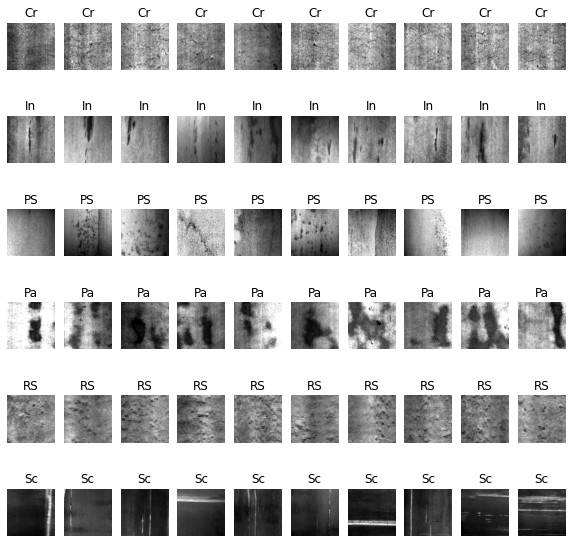

In [53]:
# 4. Show a handful of images from each class

# 6 groups (rows)
# 10 samples per group (columns)

fig, axes = plt.subplots(ncols=sample_count, nrows=n_groups, figsize=(10,10))
for ax, image_path, label in zip(axes.flatten(), subset.image_path, subset.label):
    image = PIL.Image.open(image_path)
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

# 3. Save images and class labels in a convenient manner for future use.
As it turns out, we've already done this when we saved our dataframe! You can load the dataframe in a notebook or a script. This dataframe gives you a path to a file for you to read as well as the corresponding class. We'll see in future exercises how there are other ways to accomplish this goal. And of course, you *could* read all of the images into memory and store as a numpy array and store it, but that doesn't really work as your datasets get bigger.

Remember that we shuffled the dataframe **after** we saved it. So you'll want to shuffle it after reloading it and before training your classifier.

Loading the dataframe:
```python
import os
import pandas as pd
DF_PATH = os.path.join('..', 'data', 'NEU_dataframe.pkl')
df = pd.read_pickle(DF_PATH)              
```

Remember that we shuffled the dataframe **after** we saved it. So you'll want to shuffle it after reloading it and before training your classifier.

---
# Summary
That's it! Now we can study each of the classes in this dataset and think about some strategies to pursue. Of course, in your exercise, you'll be asked to perform a classification task on this dataset. We've seen for ourselves that this dataset has 6 groups. We can see that the images vary widely in grayscale intensity, so we might want to consider ways of managing brightness as a possible feature; maybe it's unwanted or maybe we want it. There also seems to be some rotations within classes, especially scratches and inclusions. 